#####**Introduction**

Hypothesis testing is a fundamental tool in inferential statistics. Essentially, a hypothesis test quantifies the plausibility of a hypothesis—called the null hypothesis—being true, given the observed sample. In other words, it verifies whether there is sufficient evidence in the sample to support or reject the hypothesis under consideration.

Naturally, the first step in hypothesis testing is to formulate the hypotheses to be evaluated. In general, two hypotheses are considered. The null hypothesis, as mentioned, is the one we aim to test, and it is assumed to be true until proven otherwise—that is, until it is statistically rejected. The other is the alternative hypothesis, which must be complementary to the null: if the null hypothesis is false, the alternative must necessarily be true.

In the test conducted in this work, the goal is to determine whether the observed difference between the means of two independent samples is statistically significant. However, to perform this test, certain preconditions must be met. First, the data must come from populations that follow a Normal distribution. Second, we must understand the relationship between the variances of the populations. With this in mind, a Shapiro-Wilk test will first be conducted (in a concise manner, using functions implemented in Python) to check the normality of the distributions. Next, a variance comparison test will be performed to determine whether the test of means should assume equal unknown variances, or unequal unknown variances.

It is important to note that, in the formulation of the hypotheses, the term "means" refers to population parameters, whereas the means available for performing the test are sample statistics.

The significance level (𝛼) is the probability of rejecting the null hypothesis when it is actually true. A commonly used value for 𝛼 is 0.05.


#####**Testing Statistic Calculation:**

The test statistic is a value calculated from the sample data and is used to decide between the null and alternative hypotheses. Depending on the type of test, this statistic may follow different probability distributions. In the case of a comparison of means test with unknown variances, the test statistic follows a t-Student distribution.

This is because, given that the population variances are unknown, they must be estimated from the sample. As a result, the variability of this estimator must also be taken into account. This is accounted for by the t-distribution.



#####**Regions and Decision-making**


Based on the test statistic and the significance level, the critical region is determined. If the value of the test statistic falls within this region, the null hypothesis is rejected. Otherwise, there is not enough evidence to reject the null hypothesis.

###**Aplication**

#####**Imports**

In [ ]:
# Importa as bibliotecas necessárias para manipulação dos dados, plotagem dos gráticos e fórmulas de inferência estatística
import pandas as pd
import numpy as np
import scipy.stats as stats
from math import sqrt
from scipy.stats import t
import matplotlib.pyplot as plt
from datetime import datetime, timedelta
pd.options.mode.chained_assignment = None

#####**Data**

In [ ]:
# Carrega os dados do arquivo CSV no github
df = pd.read_csv("https://raw.githubusercontent.com/MuriloLirani/Estatistica/main/Bells_Palsy_Clinical_Trial.csv")
df

,Patient ID,Birthday,Sex,Baseline Score on House–Brackmann scale,Time between onset of symptoms and start of treatment,Treatment Group,Received Prednisolone,Received Acyclovir,3-Month Score on House–Brackmann scale,Full Recovery in 3 Months,9-Month Score on House–Brackmann scale,Full Recovery in 9 Months
0,1,1971-11-15,Female,6,Within 24 hr,Prednisolone–Placebo,Yes,No,2,No,2,No
1,2,1970-10-08,Female,6,Within 24 hr,Prednisolone–Placebo,Yes,No,1,Yes,1,Yes
2,3,1977-06-06,Female,4,>24 to ≤48 hr,Prednisolone–Placebo,Yes,No,1,Yes,1,Yes
3,4,1977-01-16,Female,3,Within 24 hr,Prednisolone–Placebo,Yes,No,1,Yes,1,Yes
4,5,1981-08-24,Female,3,>24 to ≤48 hr,Prednisolone–Placebo,Yes,No,1,Yes,1,Yes
...,...,...,...,...,...,...,...,...,...,...,...,...
489,479,1992-03-14,Male,4,>24 to ≤48 hr,Placebo–Placebo,No,No,1,Yes,1,Yes
490,410,1996-06-16,Female,4,Within 24 hr,Placebo–Placebo,No,No,1,Yes,1,Yes
491,391,1995-05-02,Female,2,Within 24 hr,Placebo–Placebo,No,No,1,Yes,1,Yes
492,400,1998-05-29,Female,2,>24 to ≤48 hr,Placebo–Placebo,No,No,1,Yes,1,Yes


In [ ]:
# Indica diferentes grupos de aplicação do teste
df["Treatment Group"].unique()

array(['Prednisolone–Placebo', 'Acyclovir–Prednisolone',
       'Acyclovir–Placebo', 'Placebo–Placebo'], dtype=object)

In [ ]:
# Atributos do paciente
df.columns

Index(['Patient ID', 'Birthday', 'Sex',
       'Baseline Score on House–Brackmann scale',
       'Time between onset of symptoms and start of treatment',
       'Treatment Group', 'Received Prednisolone', 'Received Acyclovir',
       '3-Month Score on House–Brackmann scale', 'Full Recovery in 3 Months',
       '9-Month Score on House–Brackmann scale', 'Full Recovery in 9 Months'],
      dtype='object')

In [ ]:
# Determinação da coluna de tempo entre sentir os sintomas e iniciar o tratamento
df['Time between onset of symptoms and start of treatment'].unique()
df = df[(df['Time between onset of symptoms and start of treatment'] != 'Unknown') & (df['Time between onset of symptoms and start of treatment'] != 'Within 24 hr')]

In [ ]:
# Date of clinical test
reference_date = pd.to_datetime(datetime(2024, 2, 13))
df['Birthday'] = pd.to_datetime(df['Birthday'], format='%Y-%m-%d')
df['Age_Days'] = (reference_date - df['Birthday']).apply(lambda x: x.days)
df

,Patient ID,Birthday,Sex,Baseline Score on House–Brackmann scale,Time between onset of symptoms and start of treatment,Treatment Group,Received Prednisolone,Received Acyclovir,3-Month Score on House–Brackmann scale,Full Recovery in 3 Months,9-Month Score on House–Brackmann scale,Full Recovery in 9 Months,Age_Days
2,3,1977-06-06,Female,4,>24 to ≤48 hr,Prednisolone–Placebo,Yes,No,1,Yes,1,Yes,17053
4,5,1981-08-24,Female,3,>24 to ≤48 hr,Prednisolone–Placebo,Yes,No,1,Yes,1,Yes,15513
5,6,1975-08-15,Female,4,>48 to ≤72 hr,Prednisolone–Placebo,Yes,No,1,Yes,1,Yes,17714
6,7,1986-04-27,Male,4,>24 to ≤48 hr,Prednisolone–Placebo,Yes,No,1,Yes,1,Yes,13806
7,8,1995-09-22,Female,4,>24 to ≤48 hr,Prednisolone–Placebo,Yes,No,1,Yes,1,Yes,10371
...,...,...,...,...,...,...,...,...,...,...,...,...,...
481,381,1988-12-25,Female,3,>24 to ≤48 hr,Placebo–Placebo,No,No,1,Yes,1,Yes,12833
485,438,1990-04-03,Female,4,>24 to ≤48 hr,Placebo–Placebo,No,No,2,No,1,Yes,12369
489,479,1992-03-14,Male,4,>24 to ≤48 hr,Placebo–Placebo,No,No,1,Yes,1,Yes,11658
492,400,1998-05-29,Female,2,>24 to ≤48 hr,Placebo–Placebo,No,No,1,Yes,1,Yes,9391


#####**Features**

In [ ]:
# Filtra os dados para remover grupos específicos de tratamento e reinicia os índices
df = df[~df["Treatment Group"].isin(['Acyclovir–Placebo', 'Acyclovir–Prednisolone'])].reset_index(drop=True)

# Seleciona apenas as colunas relevantes para a análise
df = df[['Age_Days', 'Treatment Group', 'Full Recovery in 3 Months']]

# Substitui nomes de grupos de tratamento para simplificação
replace_dict = {'Prednisolone–Placebo': 'Prednisolone', 'Placebo–Placebo': 'Placebo'}
df["Treatment Group"] = df["Treatment Group"].replace(replace_dict)

df

,Age_Days,Treatment Group,Full Recovery in 3 Months
0,17053,Prednisolone,Yes
1,15513,Prednisolone,Yes
2,17714,Prednisolone,Yes
3,13806,Prednisolone,Yes
4,10371,Prednisolone,Yes
...,...,...,...
121,12833,Placebo,Yes
122,12369,Placebo,No
123,11658,Placebo,Yes
124,9391,Placebo,Yes


Conforme mencionado, o primeiro passo será verificar se os dados podem ser aproximados por uma distribuição Normal.

#####**Normality Test**

The **Shapiro-Wilk test** evaluates the null hypothesis that a sample ($x_1, \dots, x_n$) comes from a normally distributed population. The test statistic is given by:

$$
W = \frac {\left( \sum_{i=1}^n a_i x_{(i)} \right)^2}{\sum_{i=1}^n (x_i - \bar{x})^2}
$$

Where:

- $x_{(i)}$ (with parentheses around the subscript $i$; not to be confused with $x_i$) is the *i-th order statistic*, i.e., the *i-th smallest number* in the sample;
- $\bar{x} = \frac{1}{n} \sum_{i=1}^n x_i$ is the **sample mean**.

The coefficients $a_i$ are given by:

$$
(a_1, \dots, a_n) = \frac{\mathbf{m}^\top \mathbf{V}^{-1}}{C}
$$

Where:

$$
C = \| \mathbf{V}^{-1} \mathbf{m} \| = \left( \mathbf{m}^\top \mathbf{V}^{-1} \mathbf{V}^{-1} \mathbf{m} \right)^{1/2}
$$

and the vector $\mathbf{m}$ is defined as:

$$
\mathbf{m} = (m_1, \dots, m_n)^\top
$$

which consists of the **expected values of the order statistics** of $n$ independent and identically distributed random variables drawn from a **standard normal distribution**.

Finally, $\mathbf{V}$ is the **covariance matrix** of those order statistics.


In [ ]:
# Extraindo os dados de cada grupo
prednisolone_group = df[df['Treatment Group'] == 'Prednisolone']['Age_Days']
placebo_group = df[df['Treatment Group'] == 'Placebo']['Age_Days']

# Passo 1: Teste para normalidadde de dados: Shapiro-Wilk
shapiro_pred = stats.shapiro(prednisolone_group)
shapiro_placebo = stats.shapiro(placebo_group)

print(f"Teste Shapiro-Wilk para a normalidade dos dados no grupo Prednisolone - Statictic: {shapiro_pred[0]}, P-Valor: {shapiro_pred[1]}")
print(f"Teste Shapiro-Wilk para a normalidade dos dados no grupo Placebo - Statictic: {shapiro_placebo[0]}, P-Valor: {shapiro_placebo[1]}")

Teste Shapiro-Wilk para a normalidade dos dados no grupo Prednisolone - Statictic: 0.9863817095756531, P-Valor: 0.6494099497795105
Teste Shapiro-Wilk para a normalidade dos dados no grupo Placebo - Statictic: 0.9870907664299011, P-Valor: 0.8102291226387024


The **p-value** of both tests was greater than 0.05. Therefore, we do **not reject** the null hypothesis, indicating that there is **not enough evidence** to conclude that the data are **not normally distributed**.


**Visualizing normality of distribution**

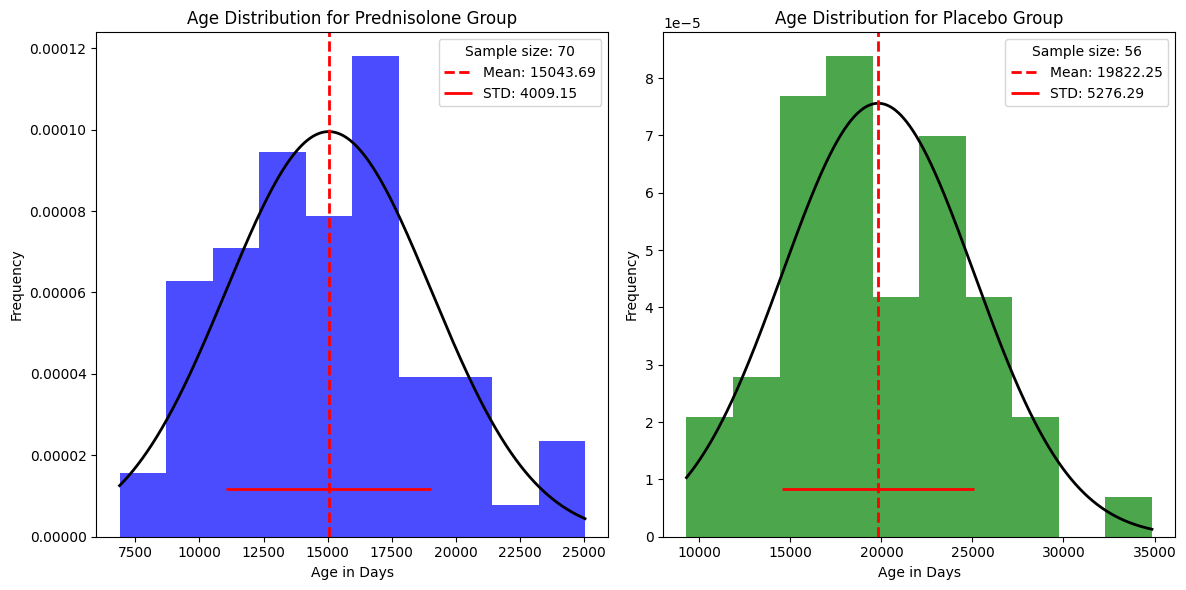

In [ ]:
# Calculando média e desvio padrão para cada grupo
mean_pred = np.mean(prednisolone_group)
std_pred = np.std(prednisolone_group, ddof=1)
n_pred = len(prednisolone_group)
mean_placebo = np.mean(placebo_group)
std_placebo = np.std(placebo_group, ddof=1)
n_placebo = len(placebo_group)

# Histograma: cusvas de distribuição normal
plt.figure(figsize=(12, 6))

# Grupo Prednisolone
plt.subplot(1, 2, 1)
count, bins, ignored = plt.hist(prednisolone_group, bins=10, color='blue', alpha=0.7, density=True)
x_values_range = range(prednisolone_group.min(), prednisolone_group.max())
plt.plot(x_values_range, stats.norm.pdf(x_values_range, mean_pred, std_pred), color='black', linewidth=2)
plt.title('Age Distribution for Prednisolone Group')
plt.xlabel('Age in Days')
plt.ylabel('Frequency')
plt.axvline(mean_pred, color='red', linestyle='dashed', linewidth=2, label=f'Mean: {mean_pred:.2f}')
plt.hlines(0.1*count.max(), mean_pred - std_pred, mean_pred + std_pred, color='red', linestyle='solid', linewidth=2, label=f'STD: {std_pred:.2f}')
plt.legend(title=f'Sample size: {n_pred}')

# Grupo Placebo
plt.subplot(1, 2, 2)
count, bins, ignored = plt.hist(placebo_group, bins=10, color='green', alpha=0.7, density=True)
x_values_range = range(placebo_group.min(), placebo_group.max())
plt.plot(x_values_range, stats.norm.pdf(x_values_range, mean_placebo, std_placebo), color='black', linewidth=2)
plt.title('Age Distribution for Placebo Group')
plt.xlabel('Age in Days')
plt.ylabel('Frequency')
plt.axvline(mean_placebo, color='red', linestyle='dashed', linewidth=2, label=f'Mean: {mean_placebo:.2f}')
plt.hlines(0.1*count.max(), mean_placebo - std_placebo, mean_placebo + std_placebo, color='red', linestyle='solid', linewidth=2, label=f'STD: {std_placebo:.2f}')
plt.legend(title=f'Sample size: {n_placebo}')

plt.tight_layout()
plt.show()

Once the normality of the data has been confirmed, we aim to establish a relationship between the **sample variances** of the groups. This is important because, if the variances can be considered equal, we will use one type of test. If they **cannot** be considered equal, a **slightly different test** must be used instead.


#####**Test for Variances of Independent Samples**

Comparing variances and determining whether they are significantly different involves performing an **F-test** with a **null hypothesis** that the variances of the two groups are equal.

Regarding the procedure with the two samples: first, we calculate the sample variances $s_1^2$ and $s_2^2$, and then compute the test statistic:

**Observed F-statistic**:  
$$
F_{obs} = \frac{s_1^2}{s_2^2}
$$

Next, we determine the **degrees of freedom** based on the group sizes:  
- $df_1 = n_1 - 1$  
- $df_2 = n_2 - 1$

With all this information, we consult an **F-distribution table** to find the **critical value** at a **5% significance level**.


In [ ]:
# Passo 2: Teste F para igualdade de variâncias
f_test = stats.levene(prednisolone_group, placebo_group)

print(f"Teste F para igualdade de variâncias - Statictic: {f_test[0]}, P-Valor: {f_test[1]}")

Teste F para igualdade de variâncias - Statictic: 4.71645380401903, P-Valor: 0.03177864506223148


As the **p-value** was obtained using the two-tailed cumulative distribution function of the F-distribution (`stats.f.cdf`), we calculated the cumulative probability. In our case, the result was **less than 0.05**, indicating that we **reject the null hypothesis**, and therefore, the **variances are not equal**.

As a result, we can proceed with a **two-sample mean comparison test** assuming **unknown and unequal population variances**.


#####**Test for Comparing Means of Independent Samples*

The test can be performed in just a few lines of code, just like the previous ones, by using functions already implemented in the imported libraries. However, since this test is the **main focus of the study**, its step-by-step procedure will be described in detail.


In [ ]:
# Passo 3: T-test para igualdade de médias
if f_test.pvalue > 0.05:
    # Se as variâncias forem iguais
    t_test = stats.ttest_ind(prednisolone_group, placebo_group, equal_var=True)
else:
    # Se as variâncias não forem iguais
    t_test = stats.ttest_ind(placebo_group, prednisolone_group, equal_var=False)

print(f"T-test para igualdade de médias - Statictic: {t_test[0]}, P-Valor: {t_test[1]}")

T-test para igualdade de médias - Statictic: -5.6053883534052185, P-Valor: 1.8288645168067235e-07


We will now compare the **mean ages** between the groups that **used** and **did not use** the medication. Since we have already tested the **normality** of the data and concluded that the **population variances are unknown and unequal**, we will use a **two-sample mean comparison test** for independent populations that meets these conditions.

In [ ]:
# Dados já calculados
#   mean_pred
#   std_pred
#   n_pred
#   mean_placebo
#   std_placebo
#   n_placebo

As with any hypothesis test, we begin by stating the objective and formulating the hypotheses.

The main goal of this test is to verify whether the selected sample is **unbiased with respect to the ages** of the individuals. In other words, we want to determine whether there are **no statistically significant differences** between the groups that used the medication and those that did not. This is important because, if there is a difference in age, it could call into question any observed treatment effects due to **heterogeneity in this sample characteristic**.

Thus, we have the following hypotheses:

- **H₀**: The average age of individuals who received the medication and those who received the placebo is the same.  
- **H₁**: The average ages of the two groups are different.

More specifically, this can be stated as:

- **H₀**: $\mu_{placebo} = \mu_{treated} \quad \Rightarrow \quad \mu_{placebo} - \mu_{treated} = 0$  
- **H₁**: $\mu_{placebo} \neq \mu_{treated} \quad \Rightarrow \quad \mu_{placebo} - \mu_{treated} \neq 0$


Now, we calculate the testing statistic, in the supposition the null hypothesis is true


**Test Statistic**

The test statistic is calculated as:

$$
t = \frac{(\bar{X}_1 - \bar{X}_2) - (\mu_1 - \mu_2)}{\sqrt{\frac{s_1^2}{n_1} + \frac{s_2^2}{n_2}}}
$$

The degrees of freedom are calculated using the **Welch–Satterthwaite equation**:

$$
df = \frac{\left( \frac{s_1^2}{n_1} + \frac{s_2^2}{n_2} \right)^2}
{\frac{\left( \frac{s_1^2}{n_1} \right)^2}{n_1 - 1} + \frac{\left( \frac{s_2^2}{n_2} \right)^2}{n_2 - 1}}
$$

Where:

- $\bar{X}_1$ and $\bar{X}_2$: sample means of the two groups  
- $\mu_1$ and $\mu_2$: population means assumed under the null hypothesis (typically $\mu_1 - \mu_2 = 0$)  
- $s_1^2$ and $s_2^2$: sample variances  
- $n_1$ and $n_2$: sample sizes


In [ ]:
Tobs = ((mean_placebo - mean_pred) - (0))/sqrt(((std_placebo*std_placebo)/n_placebo) + ((std_pred*std_pred)/n_pred))
Tobs

This is the **observed value** of the test statistic. Now, we will obtain the **critical value** of the test. It is taken from the **t-Student distribution table**, using a significance level of $p = 0.05$.

As for the degrees of freedom, they must be calculated using the following formula:


To calculate the **degrees of freedom** for the Welch's t-test, we use the following code:

$$
df = \frac{
\left( \frac{s_1^2}{n_1} + \frac{s_2^2}{n_2} \right)^2
}{
\frac{\left( \frac{s_1^2}{n_1} \right)^2}{n_1 - 1}
+
\frac{\left( \frac{s_2^2}{n_2} \right)^2}{n_2 - 1}
}
$$

Where:

- $s_1^2$ and $s_2^2$ are the sample variances of the placebo and treated groups, respectively  
- $n_1$ and $n_2$ are the sample sizes of each group  
- $df$ is the approximated degrees of freedom


In [ ]:
# Número de graus de liberdade
numerator = (((std_placebo ** 2) / n_placebo) + ((std_pred ** 2) / n_pred)) ** 2
denominator = ((((std_placebo ** 2) / n_placebo) ** 2) / (n_placebo - 1)) + ((((std_pred ** 2)/ n_pred) ** 2) / (n_pred - 1))
gl = numerator / denominator

# Nível de significância (p)
alpha = 0.05

# Valor crítico da tabela t (t crítico para uma cauda superior, então usamos 1 - alpha/2)
t_critical = t.ppf(1 - alpha / 2, gl)

print("Valor crítico da tabela t para 55 graus de liberdade e p = 0.05:", t_critical)

Valor crítico da tabela t para 55 graus de liberdade e p = 0.05: 1.9838607147980285


Therefore, the **critical region** is defined as:  
$\{ x < -1.983 \} \cup \{ x > 1.983 \}$

Graphically, we have the following situation:

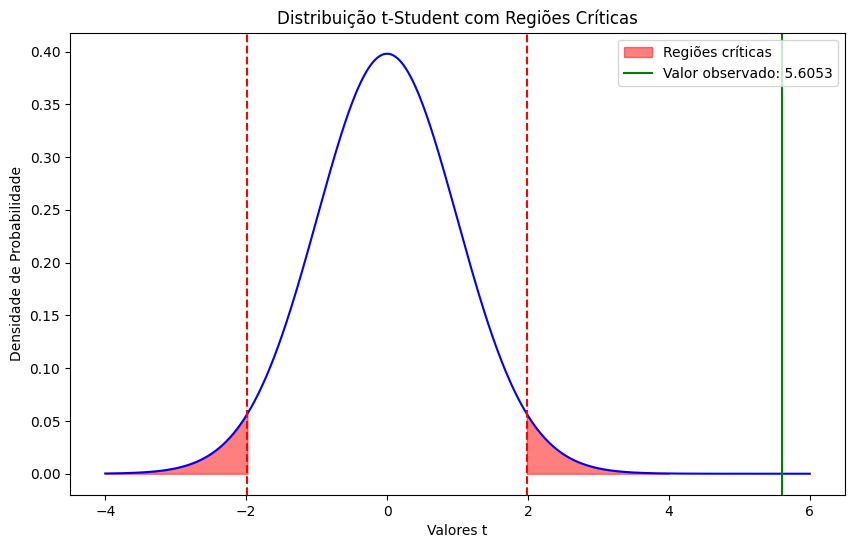

In [ ]:

# Valores críticos e valor observado
critical_value_left = -1.983
critical_value_right = 1.983
observed_value = 5.6053

# Geração dos dados para a distribuição t
x = np.linspace(-4, 6, 1000)
y = stats.t.pdf(x, gl)

# Plot da distribuição t-Student
plt.figure(figsize=(10, 6))
plt.plot(x, y, color='blue')

# Colorir as regiões críticas
x_fill_left = np.linspace(-4, critical_value_left, 100)
x_fill_right = np.linspace(critical_value_right, 4, 100)
plt.fill_between(x_fill_left, stats.t.pdf(x_fill_left, gl), color='red', alpha=0.5, label='Regiões críticas')
plt.fill_between(x_fill_right, stats.t.pdf(x_fill_right, gl), color='red', alpha=0.5)

# Marcar os valores críticos
plt.axvline(critical_value_left, color='red', linestyle='--')
plt.axvline(critical_value_right, color='red', linestyle='--')

# Marcar o valor observado
plt.axvline(observed_value, color='green', linestyle='-', label=f'Valor observado: {observed_value}')

# Configurações adicionais do gráfico
plt.title('Distribuição t-Student com Regiões Críticas')
plt.xlabel('Valores t')
plt.ylabel('Densidade de Probabilidade')
plt.legend()

# Mostrar o gráfico
plt.show()

As we can see, the **observed value** ($T_{obs}$) falls within the **critical region**. Therefore, we **reject the null hypothesis (H₀)**.

In other words, we have **statistical evidence** to suggest that the **mean ages of the two groups are not equal**.

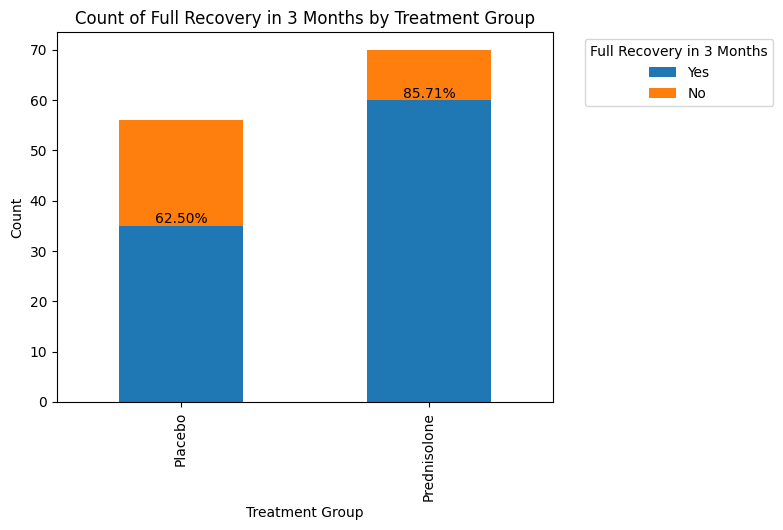

In [ ]:
grouped = df.groupby(['Treatment Group', 'Full Recovery in 3 Months']).size().unstack(fill_value=0)

# Swap the columns so that 'yes' is at the bottom of the stack
grouped = grouped[['Yes', 'No']]

# Calculate proportions of 'yes'
proportions_yes = grouped['Yes'] / grouped.sum(axis=1)

# Plotting
ax = grouped.plot(kind='bar', stacked=True)
plt.xlabel('Treatment Group')
plt.ylabel('Count')
plt.title('Count of Full Recovery in 3 Months by Treatment Group')

# Annotate bars with proportions of 'yes'
for i, proportion in enumerate(proportions_yes):
    plt.text(i, grouped.iloc[i, 0] + 0.5, f'{proportion:.2%}', ha='center')

plt.legend(title='Full Recovery in 3 Months', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.show()
